In [1]:
import numpy as np
with open('../build/mat_id_vertex.txt') as file:
    array2d = [[float(digit) for digit in line.split()] for line in file]
mat_id_vertex = np.array(array2d, dtype = int)
row_v, col_v = np.meshgrid(
    np.arange(0,mat_id_vertex.shape[0]),
    np.arange(0,mat_id_vertex.shape[1]),
    indexing='ij')

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

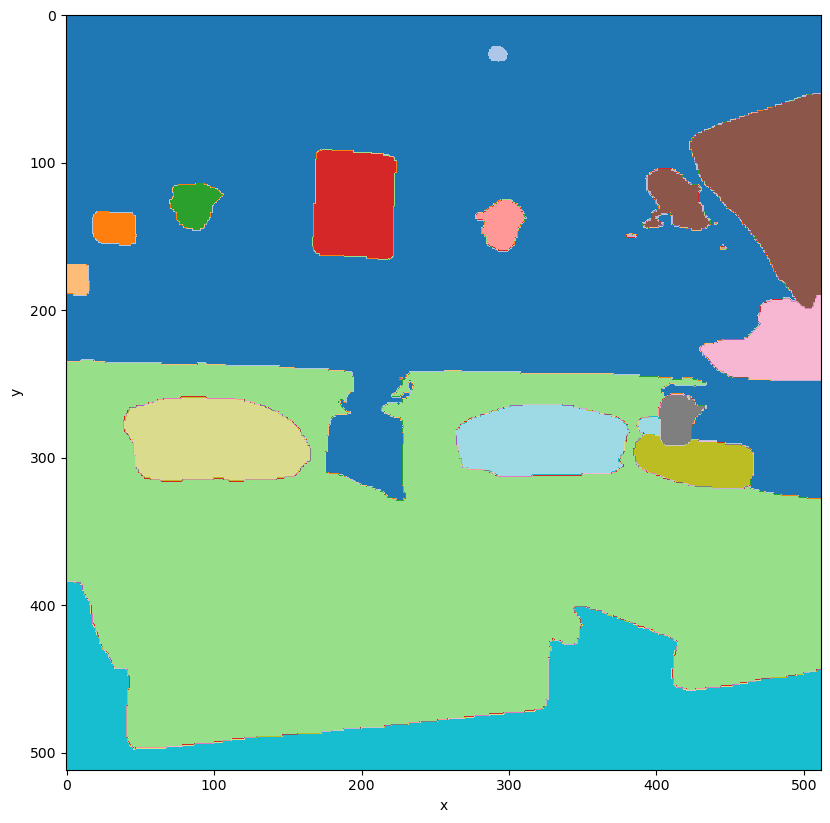

In [3]:
fig = plt.figure(figsize=(10, 10),dpi=100)
ax = plt.axes()#projection='3d'
# ax.scatter(row_v, col_v, mat_id_vertex,c=mat_id_vertex,
#                 cmap='tab20')
ax.imshow(mat_id_vertex, cmap='tab20')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.view_init(azim = 0, elev = 90)
plt.savefig('vertices1.png')

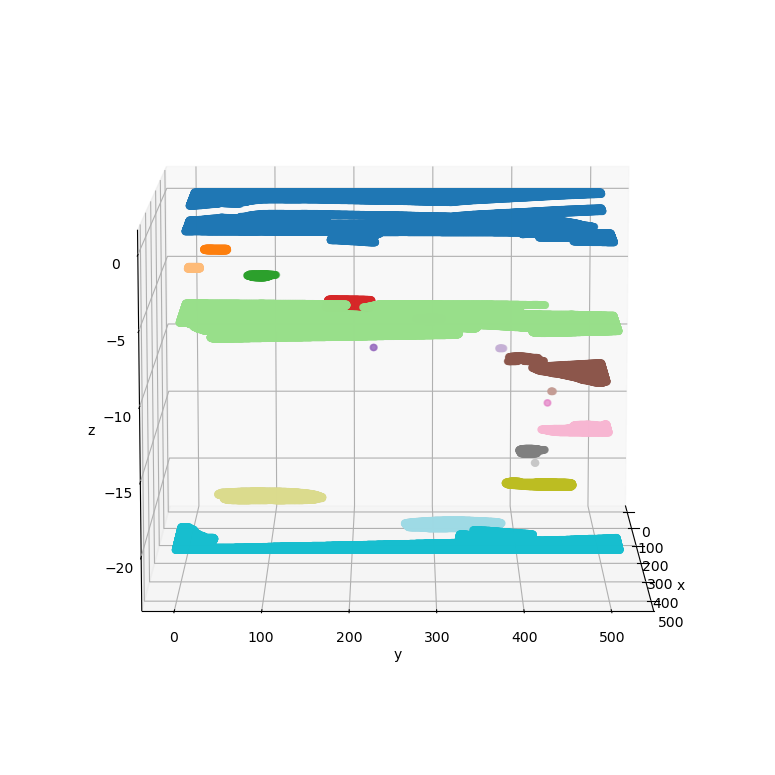

In [4]:
fig = plt.figure(figsize=(10, 10),dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(row_v, col_v, -mat_id_vertex,c=mat_id_vertex,
                cmap='tab20')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim = 0, elev = 10)
plt.savefig('vertices2.png')

In [5]:
with open('../build/mat_adjacency.txt') as file:
    array2d = [[float(digit) for digit in line.split()] for line in file]
mat_adjacency = np.array(array2d)

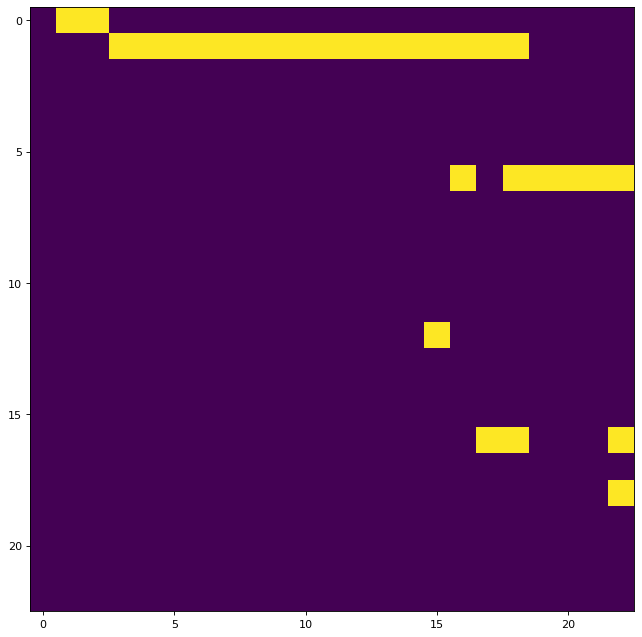

In [6]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(mat_adjacency)

In [7]:
num_vertices = mat_adjacency.shape[0]
centers = np.zeros((num_vertices,2))
for i in range(num_vertices):
    centers[i] = [np.mean(row_v[mat_id_vertex==i]),np.mean(col_v[mat_id_vertex==i])]-np.array(mat_id_vertex.shape)/2.0;
angles = np.arctan(centers[:,1]/centers[:,0])
angle_rank = np.argsort(angles)

In [29]:
with open('../build/labels.txt') as file:
    array2d = [[int(digit) for digit in line.split()] for line in file]
labels = np.array(array2d)[0]

with open('ade20k') as file:
    array2d = [[int(digit) for digit in line.split()] for line in file]
palette = np.array(array2d)

[0.8        0.01960784 1.        ]
[0.01568627 0.78431373 0.01176471]
[0.54901961 0.54901961 0.54901961]
[0.01568627 0.78431373 0.01176471]
[0.03137255 1.         0.2       ]
[0.01568627 0.78431373 0.01176471]
[0.  0.6 1. ]
[0.01568627 0.78431373 0.01176471]
[0.23921569 0.90196078 0.98039216]
[0.  0.6 1. ]
[0.54901961 0.54901961 0.54901961]
[0.  0.6 1. ]
[0.23921569 0.90196078 0.98039216]
[1.  0.  0.4]
[0.23921569 0.90196078 0.98039216]
[0.01568627 0.78431373 0.01176471]
[1.         0.27843137 0.        ]
[0. 0. 0.]
[1.         0.27843137 0.        ]
[0. 0. 0.]
[0.01568627 0.78431373 0.01176471]
[0.02745098 1.         1.        ]
[0.02352941 0.90196078 0.90196078]


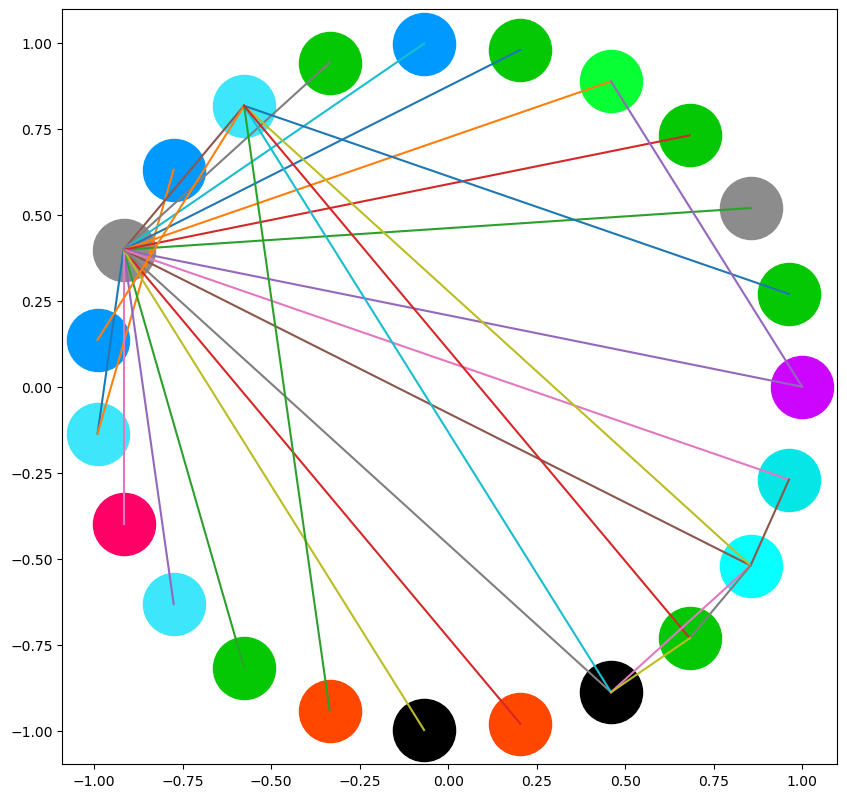

In [36]:
import math
dtheta = math.pi*2/num_vertices
fig = plt.figure(figsize=(10, 10),dpi=100)
for i in range(num_vertices):
    print(palette[labels[np.where(angle_rank==i)[0]],:][0]/255 )
    plt.scatter( math.cos(dtheta*i) , math.sin(dtheta*i) , s = 2000 , color = palette[labels[np.where(angle_rank==i)[0]],:][0]/255 )
for i in range(mat_adjacency.shape[0]):
    for j in range(mat_adjacency.shape[1]):
        if mat_adjacency[i,j]==1:
            p1 = np.where(angle_rank==i)[0]
            p2 = np.where(angle_rank==j)[0]
            plt.plot([math.cos(dtheta*p1), math.cos(dtheta*p2)] , [math.sin(dtheta*p1),math.sin(dtheta*p2)])
plt.show()